In [56]:
import logging

import matplotlib.pyplot as plt
import numpy as np
from pylbm import lbm

In [57]:
%matplotlib inline
np.set_printoptions(precision=5, suppress=True)

epochs = 1
epochs = 302
eps = 0.01
omegas = np.arange(0.1, 1.51, 0.2).round(decimals=1)
omega = 0.5
i_dim, j_dim = 200, 100
x = np.arange(i_dim)
y = np.arange(j_dim)
X, Y = np.meshgrid(x, y)

In [45]:
epochs = 2001
i_dim, j_dim = 25, 25
print_epoch = 60


i = 1
top_wall, bottom_wall, left_wall, right_wall = False,True,False,False
top_moving_lid = True

r_ij = lbm.rho_init(i_dim=i_dim, j_dim=j_dim, r_mean=1.0, eps=0.)
u_aij = lbm.local_avg_velocity_init(i_dim=i_dim, j_dim=j_dim, u_mean=0.0, eps=0.)
f_cij = lbm.f_eq(u_aij=u_aij, r_ij=r_ij)

axes = []
prints = []
for t in range(epochs):
    f_cij_old = f_cij.copy()
    f_cij = lbm.stream(f_cij=f_cij)
    if top_wall: f_cij = lbm.apply_top_wall(f_cij=f_cij, f_cij_old=f_cij_old)
    if bottom_wall: f_cij = lbm.apply_bottom_wall(f_cij=f_cij, f_cij_old=f_cij_old)
    if left_wall: f_cij = lbm.apply_left_wall(f_cij=f_cij, f_cij_old=f_cij_old)
    if right_wall: f_cij = lbm.apply_right_wall(f_cij=f_cij, f_cij_old=f_cij_old)
    f_cij = lbm.apply_sliding_top_wall(f_cij=f_cij, f_cij_old=f_cij_old, velocity=1)
    f_cij, u_aij = lbm.collision(f_cij=f_cij, omega=omega)


    

    if t%print_epoch == 1:
        prints.append([u_aij[0,:,:].T, u_aij[1,:,:].T, t])



/tmp/ipykernel_7264/2410299775.py:25: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


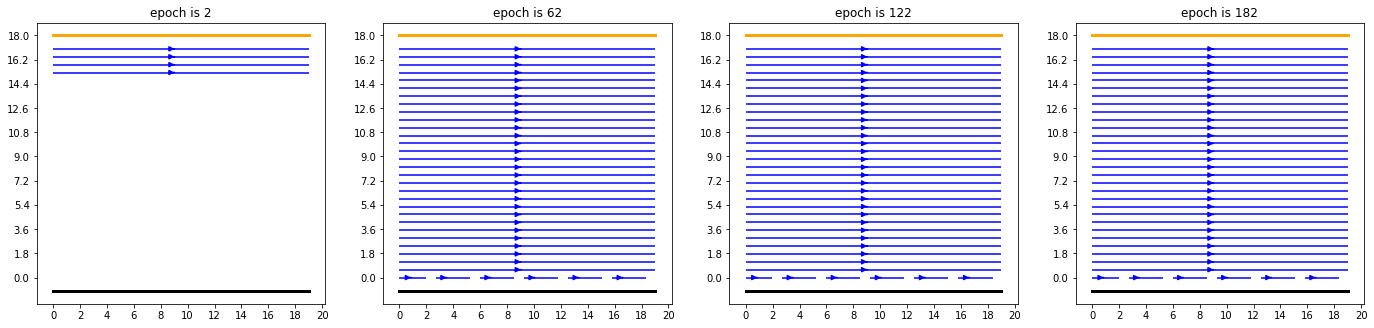

In [14]:
import m4_helpers
fig = plt.figure(figsize=(30,30))
m4_helpers()
# plt.close()

### We know that moving top wall is working if top particles have same velocity as wall

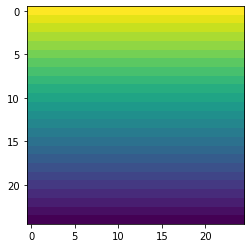

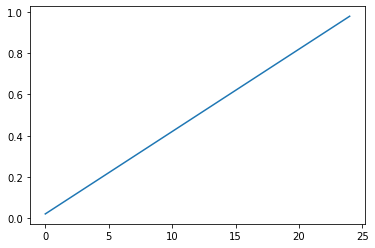

array([0.02, 0.06, 0.1 , 0.14, 0.18, 0.22, 0.26, 0.3 , 0.34, 0.38, 0.42,
       0.46, 0.5 , 0.54, 0.58, 0.62, 0.66, 0.7 , 0.74, 0.78, 0.82, 0.86,
       0.9 , 0.94, 0.98])

In [55]:
# plt.axis('off')
plt.imshow(np.rot90(u_aij[0,:,:]))
plt.show()
plt.close()


# plt.axis('off')
plt.plot(np.arange(j_dim),u_aij[0,0,:])
plt.show()
plt.close()

u_aij[0,0,:]

# Reynoldsnumber
Divides the stable and unstable purturbations like turbulance.

If larger than 1 the system could show instability and turbulance.

For sliding lid in most work choose a reynoldsnumber ~1000. 

- Gives idea of what our outcome should look like.
- use 300 grid points as $R_e = 340/10 * l = 3.4 * 300 = 1000$ (theoretically derived with certrain omega)

Re is indicator that I am in the flow regime where simulation conforms to "normal" circumstances


# Diffusion constant phi

Set to 1


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [32]:
phi = np.zeros(100)
phi[49] = 1.
D = 1.0
dx = 1.
dt = 0.1
phi0 = phi

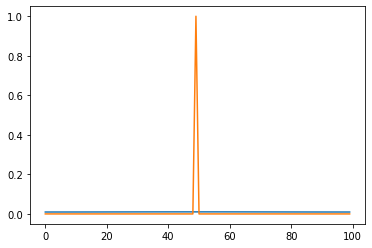

In [33]:
for i in range (10000):
    phi = phi + D*dt/dx**2*(np.roll(phi,1)-2.*phi+np.roll(phi,-1))
plt.plot(phi)
plt.plot(phi0)

Function still retains Gausian like distribution, but its super low.

15.625